In [1]:
import torch
import numpy as np

from MulticoreTSNE import MulticoreTSNE as TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm

import seaborn as sns
sns.set_palette(sns.color_palette("hls", 13))

In [2]:
feat = torch.load("../saved_features_geoplaces.pth")
text_feat = feat["text"]
image_feat = feat["image"]

n_classes = 205

### text tsne

In [3]:
source_features = text_feat["usa"]["feature"]
source_labels = text_feat["usa"]["labels"].cpu().numpy()

target_features = text_feat["asia"]["feature"]
target_labels = text_feat["asia"]["labels"].cpu().numpy()

In [4]:
## randomly subsample source
features = []
labels = []
for label_id in range(n_classes):
    label_idxs = (source_labels == label_id).nonzero()[0]
    if len(label_idxs) > 0:
        subidxs = label_idxs[:50]
        features.append(source_features[subidxs])
        labels.append(source_labels[subidxs])
source_features = np.concatenate(features)
source_labels = np.concatenate(labels)

## randomly subsample target
features = []
labels = []
for label_id in range(n_classes):
    label_idxs = (target_labels == label_id).nonzero()[0]
    if len(label_idxs) > 0:
        subidxs = label_idxs[:50]
        features.append(target_features[subidxs])
        labels.append(target_labels[subidxs])
target_features = np.concatenate(features)
target_labels = np.concatenate(labels)

len_source = len(source_features)
all_features = np.concatenate([source_features, target_features])
all_labels = np.concatenate([source_labels, target_labels])

tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(all_features)

source_tsne = tsne_embeddings[:len_source]
target_tsne = tsne_embeddings[len_source:]

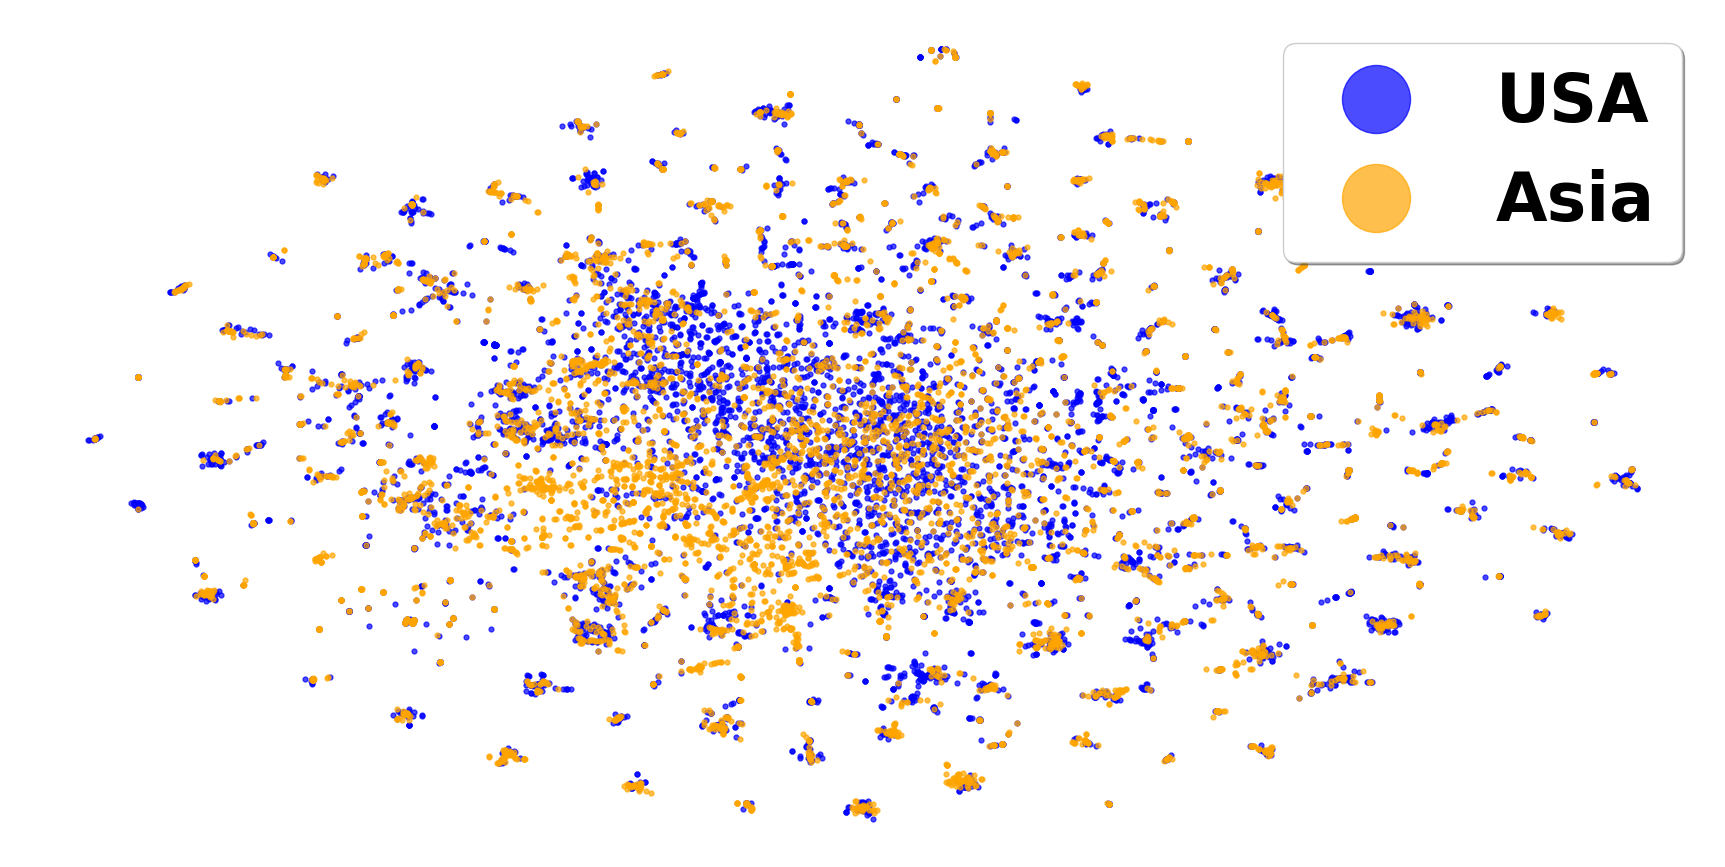

In [9]:
plt.figure(figsize=(22,11))
plt.plot(source_tsne[:,0] , source_tsne[:,1] , linestyle='none', marker='o',markersize=3.5 , color="blue", label="USA", alpha=0.7)
plt.plot(target_tsne[:,0] , target_tsne[:,1] , linestyle='none', marker='o',markersize=3.5 , color="orange", label="Asia", alpha=0.7)


plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.legend(prop={'size': 48,"weight":"bold"} , markerscale=14, loc="upper right", fancybox=True, shadow=True)

# plt.ylim(-40,25)

ax = plt.gca()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(False)
ax.spines['bottom'].set_linewidth(False)

plt.savefig("tSNE/tSNE_text_geoplaces_usa_asia.pdf", format='pdf', bbox_inches='tight')
plt.show()

### image features

In [ ]:
source_features = image_feat["usa"]["feature"]
source_labels = image_feat["usa"]["labels"].cpu().numpy()

target_features = image_feat["asia"]["feature"]
target_labels = image_feat["asia"]["labels"].cpu().numpy()

In [ ]:
## randomly subsample source
features = []
labels = []
for label_id in range(n_classes):
    label_idxs = (source_labels == label_id).nonzero()[0]
    if len(label_idxs) > 0:
        subidxs = label_idxs[:50]
        features.append(source_features[subidxs])
        labels.append(source_labels[subidxs])
source_features = np.concatenate(features)
source_labels = np.concatenate(labels)

## randomly subsample target
features = []
labels = []
for label_id in range(n_classes):
    label_idxs = (target_labels == label_id).nonzero()[0]
    if len(label_idxs) > 0:
        subidxs = label_idxs[:50]
        features.append(target_features[subidxs])
        labels.append(target_labels[subidxs])
target_features = np.concatenate(features)
target_labels = np.concatenate(labels)

len_source = len(source_features)
all_features = np.concatenate([source_features, target_features])
all_labels = np.concatenate([source_labels, target_labels])

tsne = TSNE(n_components=2)
tsne_embeddings = tsne.fit_transform(all_features)

source_tsne = tsne_embeddings[:len_source]
target_tsne = tsne_embeddings[len_source:]

In [ ]:
plt.figure(figsize=(22,14))
plt.plot(target_tsne[:,0] , target_tsne[:,1] , linestyle='none', marker='o',markersize=3.5 , color="blue", label="Asia", alpha=0.7)
plt.plot(source_tsne[:,0] , source_tsne[:,1] , linestyle='none', marker='o',markersize=3.5 , color="orange", label="USA", alpha=0.7)


plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.legend(prop={'size': 60,"weight":"bold"} , markerscale=14, loc="upper right", fancybox=True, shadow=True)

# plt.ylim(-40,25)

ax = plt.gca()
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_linewidth(False)
ax.spines['bottom'].set_linewidth(False)

plt.savefig("tSNE/tSNE_image_geoplaces_usa_asia.pdf", format='pdf', bbox_inches='tight')
plt.show()